# Run A Mixed Effects Model

### Authors: Calvin Howard.

#### Last updated: July 6, 2023

Use this to assess if a predictors relationship to the predictee is different between two groups. 

Notes:
- To best use this notebook, you should be familar with mixed effects models

# 00 - Import CSV with All Data
**The CSV is expected to be in this format**
- ID and absolute paths to niftis are critical
```
+-----+----------------------------+--------------+--------------+--------------+
| ID  | Nifti_File_Path            | Covariate_1  | Covariate_2  | Covariate_3  |
+-----+----------------------------+--------------+--------------+--------------+
| 1   | /path/to/file1.nii.gz      | 0.5          | 1.2          | 3.4          |
| 2   | /path/to/file2.nii.gz      | 0.7          | 1.4          | 3.1          |
| 3   | /path/to/file3.nii.gz      | 0.6          | 1.5          | 3.5          |
| 4   | /path/to/file4.nii.gz      | 0.9          | 1.1          | 3.2          |
| ... | ...                        | ...          | ...          | ...          |
+-----+----------------------------+--------------+--------------+--------------+
```

In [1]:
# Specify the path to your CSV file containing NIFTI paths
input_csv_path = '/Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Work/KiTH_Solutions/Research/Clinical Trial/study_metadata/all_performances.xlsx'
sheet = 'study_results'

In [2]:
# Specify where you want to save your results to
out_dir = '/Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Research/2023/autonomous_cognitive_examination_rct/figures/covariates_and_acoe_socre/age_interact_status/classification'


In [3]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=out_dir, sheet=sheet)
# Call the process_nifti_paths method
data_df = cal_palm.read_and_display_data()


,Name,Measurement,Cohort,Educational_Status,Randomization_Group,Age,Sex,Ethnicity,Cognitive_Status,Cognitive_Status_Code,...,Subjective_Complaint,Attention_Complaint,Memory_Complaint,Fluency_Complaint,Language_Complaint,Visuospatial_Complaint,Impaired_on_ACE3,iADL_Impaired,ADL_Impaired,Adjusted_Total
0,NaN,patient_15,1,1.0,1.0,42,0.0,1.0,MCI,0,...,None,NaN,NaN,NaN,NaN,NaN,Yes,None,None,72.64
1,NaN,patient_17,1,1.0,1.0,35,1.0,1.0,MCI,0,...,Yes,NaN,Yes,NaN,Yes,NaN,Yes,None,None,73.10
2,NaN,patient_19,1,1.0,1.0,71,0.0,1.0,MCI,0,...,Yes,NaN,Yes,NaN,Yes,NaN,Yes,None,None,89.02
3,NaN,patient_25,1,1.0,1.0,53,0.0,1.0,MCI,0,...,Yes,NaN,Yes,NaN,NaN,NaN,Yes,None,None,74.06
4,NaN,patient_26,1,2.0,1.0,49,0.0,0.0,MCI,0,...,Yes,NaN,NaN,NaN,Yes,NaN,Yes,None,None,83.18
5,NaN,patient_40,1,1.0,1.0,51,1.0,0.0,intact,1,...,Yes,NaN,Yes,NaN,Yes,NaN,No,None,None,96.62
6,NaN,patient_42,1,1.0,1.0,46,1.0,1.0,intact,1,...,Yes,NaN,Yes,NaN,Yes,NaN,No,None,None,92.52
7,NaN,patient_47,1,1.0,1.0,37,1.0,1.0,MCI,0,...,No,NaN,NaN,NaN,NaN,NaN,No,None,None,87.54
8,NaN,patient_108,2,1.0,1.0,35,0.0,0.0,intact,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.10
9,NaN,patient_109,2,3.0,1.0,41,0.0,0.0,MCI,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.42


In [ ]:
data_df = data_df.fillna(value=1)
data_df

# 01 - Preprocess Your Data

**Handle NANs**
- Set drop_nans=True is you would like to remove NaNs from data
- Provide a column name or a list of column names to remove NaNs from

In [ ]:
data_df.columns

In [ ]:
drop_list = ['Age', 'Z_Scored_Percent_Cognitive_Improvement']

In [ ]:
data_df = cal_palm.drop_nans_from_columns(columns_to_drop_from=drop_list)
display(data_df)

**Drop Row Based on Value of Column**

Define the column, condition, and value for dropping rows
- column = 'your_column_name'
- condition = 'above'  # Options: 'equal', 'above', 'below'

In [ ]:
data_df.columns

Set the parameters for dropping rows

In [ ]:
column = 'Cohort'  # The column you'd like to evaluate
condition = 'equal'  # The condition to check ('equal', 'above', 'below')
value = 3  # The value to compare against

In [ ]:
data_df, other_df = cal_palm.drop_rows_based_on_value(column, condition, value)
display(data_df)

**Standardize Data**
- Enter Columns you Don't want to standardize into a list

In [ ]:
# Remove anything you don't want to standardize
cols_not_to_standardize = ['Age']

In [ ]:
data_df = cal_palm.standardize_columns(cols_not_to_standardize)
data_df

Descriptive Stats

In [ ]:
data_df.describe()

# 02 - Compare Accuracy of Classifications

In [ ]:
data_df.columns

In [ ]:
data_dict = {}
for col in data_df.columns[0:]:
    

How to Use the Mapping Dictionary
- The mapping dictionary is a crucial component of the BinaryDataMetricsPlotter class. It defines the relationships between columns in your dataframe that you want to compare. Here's how to use it:

- Define the Mapping: Create a dictionary where each key-value pair represents a mapping of the columns of ground-truth classification to the column of the experimental classificaiton. 

>mapping_dict = {
>>    'gold_standard_1': 'classification_1',
>>
>>    'gold_standard_2': 'classification_2',
>>
>>    add more as needed
>>
>}

In [ ]:
data_df.columns

In [ ]:
mapping_dict = {'Cognitive_Status_Code':'Adjusted_Total'}

**Visualize Classification Metrics with Barplots**

- Sensitivity (Recall): Measures the proportion of actual positives correctly identified. Identical to recall, it assesses how well the model identifies true positives among the positive cases.

- Specificity: Indicates the proportion of actual negatives correctly identified as such. It evaluates the model's ability to recognize true negatives among negative cases.

- Precision: Refers to the proportion of positive identifications that are actually correct. It focuses on the accuracy of the positive predictions made by the model.

- Recall: Measures the proportion of actual positives that are correctly identified. This is identical to sensitivity, emphasizing the model's accuracy in detecting positive cases.

- Accuracy: The ratio of correctly predicted observations to the total observations. It provides an overall measure of the model's performance.

- F1 Score: The harmonic mean of precision and recall. This metric is particularly useful when the balance between precision and recall is important.

- Positive Predictive Value (PPV): Similar to precision, PPV is the proportion of positive test results that are true positives. It indicates the likelihood that a positive test accurately reflects the underlying condition.

- Negative Predictive Value (NPV): The proportion of negative test results that are true negatives. NPV measures the likelihood that a negative test result accurately indicates the absence of the condition.

Edit the List with the Specific Metrics You Would Like to Display
- Set to None to display all metrics

In [ ]:
specified_metrics = ['Accuracy']

Run It

In [ ]:
from calvin_utils.statistical_utils.classification_statistics import BinaryDataMetricsPlotter
plotter = BinaryDataMetricsPlotter(data_df, mapping_dict)
metrics = plotter.calculate_metrics()
plot_df = plotter.plot_metrics(metrics, specified_metrics=specified_metrics, save_dir=out_dir)

**View Classification Metrics With Radar Plots**

How to Use the Mapping Dictionary
- The mapping dictionary is a crucial component of the BinaryDataMetricsPlotter class. It defines the relationships between columns in your dataframe that you want to compare. Here's how to use it:

- Define the Mapping: Create a dictionary where each key-value pair represents a mapping of the columns of ground-truth classification to the column of the experimental classificaiton. 

>mapping_dict = {
>>    'gold_standard_1': 'classification_1',
>>
>>    'gold_standard_2': 'classification_2',
>>
>>    add more as needed
>>
>}

In [ ]:
data_df.columns

In [ ]:
mapping_dict = {'ch_case':'gpt_case', 
                'ch_retro_antero':'gpt_retro_antero', 
                'ch_confounding_disease':'gpt_confounding_disease',
                'ch_measurement':'gpt_measurement',
                'ch_disproportionate_amnesia':'gpt_disproportionate_amnesia', 
                'ch_neuroimaging':'gpt_neuroimaging',
                'ch_neurodegeneration':'gpt_neurodegeneration', 
                'ch_atypical_memory':'gpt_atypical_memory', 
                'ch_english':'gpt_english', 
                'ch_bias':'gpt_bias',
                'ch_hpi':'gpt_hpi', 
                'ch_workup':'gpt_workup', 
                'ch_attribution':'gpt_attribution', 
                'ch_extended_history':'gpt_extended_history',
                'ch_temporal_history':'gpt_temporal_history', 
                'ch_neuroimaging_at_onset':'gpt_neuroimaging_at_onset', 
                'ch_replicability':'gpt_replicability',
                'ch_lnm':'gpt_lnm'}

Edit the List with the Specific Metrics You Would Like to Display
- Set to None to display all metrics

In [ ]:
specified_metrics = None


Run it

In [ ]:
plotter = BinaryDataMetricsPlotter(data_df, mapping_dict)
metrics = plotter.calculate_metrics()
plot_df = plotter.plot_radar_charts(metrics, specified_metrics=specified_metrics, save_dir=out_dir)

Visualize the Results in a Dataframe

In [ ]:
df = BinaryDataMetricsPlotter.convert_metrics_to_dataframe(metrics)
df.to_csv(out_dir+'/metrics.csv')
df

# 03 - Evaluate Metrics
- If you have ground truths and some sort of continuous variable which can be used for classification, this will help you visualize that.
```
Args:
    fitted_model: The result object from a fitted statsmodels MNLogit model.
    outcome_matrix: A pandas DataFrame with the true class outcomes in one-hot encoded format.
    normalization: Normalization method for the confusion matrix (None, 'true', 'pred', 'all').
    predictions_df: Manually entered DataFrame of predictions, can contain probabilities or dummy-coded predictions.
    thresholds (dict): a dictionary mapping the index of the threshold to the probability threshold to make that classification. 
    assign_labels (bool): Scipy's confusion matrix orders by minimum to maximum occurence of the predictions. It will output the confusion matrix by this. 
            If set to False, we will organize our confusion matrix as per scipy's order. 
```
- The ROC considers clasisfications acoss ALL POSSIBLE PROBABILITIES, demonstrating what is ultiamtely accomplishable at the best possible threshold

- First curve is ROC for classifcation of each class with respect to all other classes
- Second Curve (Macro Average) is basically a meta-analytic ROC with equal weight per class.
- Third Curve (Micro Average) is basically a meta-analytic ROC with weight proportional to class sample

In [ ]:
data_df.columns

In [4]:
# data_df['Cognitive_Status_Code'] = 
data_df['Adjusted_Total'] = data_df['Adjusted_Total']/100

If you do not have predictions and observations organized as:
```
Observations (columns are a given classificaiton)
    [[0, 1, 0, 0],
      1, 0 ,0 ,0]]
predictions (columns are a given classification, value is the p(class))      
    It will expect predictions dataframeto take the form where prediction for a given classificition is an array of probability:
    [[0.2, 0.7, 0.1, 0.0],
      0.9, 0.05, 0.05, 0.0]]
```
then shape them here:

In [5]:
import pandas as pd

def create_observations_df(df, outcome_column):
    # One-hot encode the binary outcomes
    observations_df = pd.get_dummies(df[outcome_column])
    return observations_df

def create_predictions_df(df, probability_column):
    # Assuming binary classification, the probability of the negative class is 1 minus the probability of the positive class
    predictions_df = pd.DataFrame({
        0: 1 - df[probability_column],
        1: df[probability_column]
    })
    return predictions_df
observations_df = create_observations_df(data_df, 'Cognitive_Status')
predictions_df = create_predictions_df(data_df, 'Adjusted_Total')
predictions_df

,0,1
0,0.2736,0.7264
1,0.2690,0.7310
2,0.1098,0.8902
3,0.2594,0.7406
4,0.1682,0.8318
5,0.0338,0.9662
6,0.0748,0.9252
7,0.1246,0.8754
8,0.0990,0.9010
9,0.2258,0.7742


Applying prescribed thresholds for prediction.
Multiclass problem detected. Using One Vs. All approach for diagnostics.
Accuracy: 0.9182795698924731
Sensitivity: 0.9186590689213023
Specificity: 0.9186590689213021
PPV: 0.9182795698924731
NPV: 0.9182795698924732


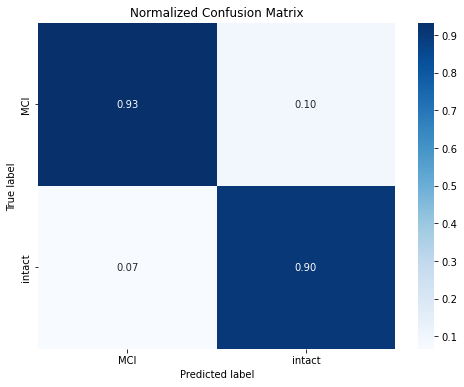

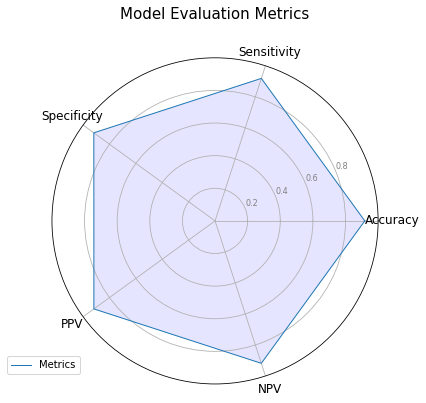

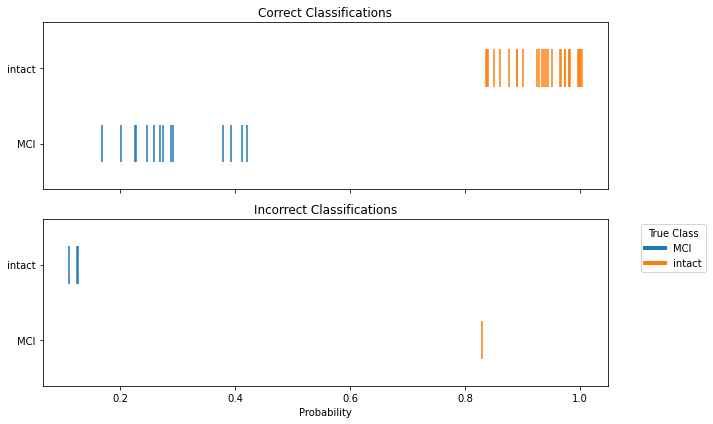

In [12]:
from calvin_utils.statistical_utils.classification_statistics import ComprehensiveMulticlassROC, ClassificationEvaluation, MicroAverageROC
evaluator = ClassificationEvaluation(fitted_model=None, observation_df=observations_df, predictions_df=predictions_df, normalization='pred',
                                     thresholds={0:0.167, 1:0.873}, out_dir='/Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Research/2023/autonomous_cognitive_examination_rct/figures/age_adjustment/classification')
evaluator.run()

# Evaluate Binary Classification

Derive Optimal Threhsold from ROC with Youden's J

In [ ]:
from sklearn.metrics import roc_curve, auc

def find_optimal_threshold(data_df, target_column, score_column):
    """
    This function calculates the optimal threshold using Youden's J statistic from an ROC curve.

    Parameters:
    data_df (pd.DataFrame): The dataframe containing the data.
    target_column (str): The name of the column in data_df that contains the binary target variable.
    score_column (str): The name of the column in data_df that contains the probability scores or model outputs.

    Returns:
    float: The optimal threshold based on Youden's J statistic.
    """
    # Extract the true labels and the scores from the dataframe
    y_true = data_df[target_column]
    scores = data_df[score_column]

    # Calculate the false positive rate, true positive rate, and thresholds
    fpr, tpr, thresholds = roc_curve(y_true, scores)

    # Calculate Youden's J statistic for each threshold
    youden_j = tpr - fpr

    # Find the index of the maximum Youden's J
    max_index = youden_j.argmax()

    # Extract the optimal threshold
    optimal_threshold = thresholds[max_index]

    return optimal_threshold


In [ ]:
data_df.columns

In [ ]:
find_optimal_threshold(data_df, 'Cognitive_Status_Code', 'Adjusted_Total')